In [7]:
import proplot as plot
import numpy as np

## Niu2007-std (LMDZOR-STD-NY07-CUSTOM-200)

$$
F=\tanh \frac{d}{0.025\left[ \frac{\rho (1+\sigma_{topo}/200) }{50}\right]}
$$

In [8]:
# Add (1+std/200) (au pif parait pas mal ?)

def F_NY07(d, z0, rho_snow, rho_new, m, std):
     return np.tanh( d / ( 2.5 * z0 * (rho_snow * (1+std/200) /rho_new)**m ) )*100

In [9]:
d = plot.arange(0,10,0.01) # grid cell average snow depth [m]
z0 = 0.01 # ground roughness length [m]
rho_snow = 300 # snow density [kg/m3]
rho_new = 100 # density of new snow [kg/m3]
m = 1.6 # The value of m given by NY07 is 1.6, while the value of m used in CLM4 is 1.0
std = 200

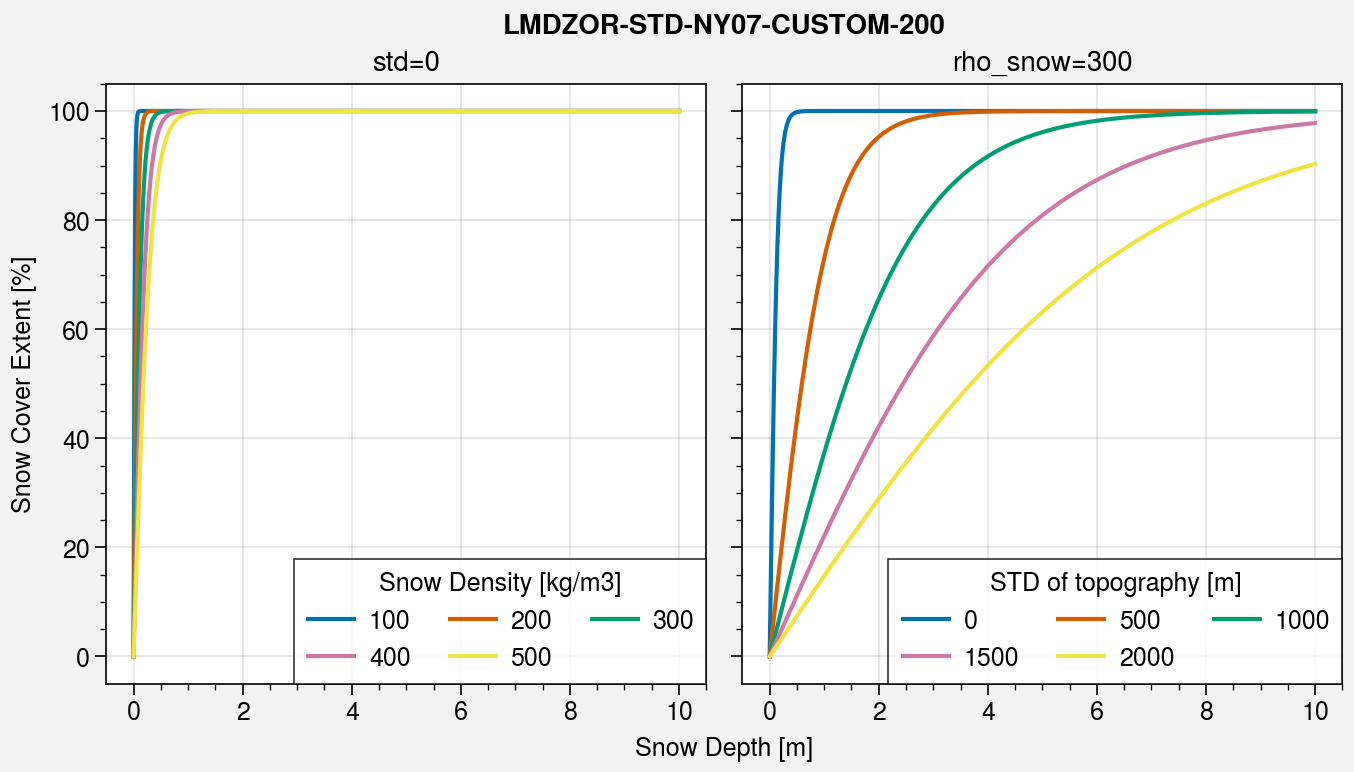

In [10]:
rho_snow_list = plot.arange(100,500,100)
std_list = plot.arange(0,2000,500)

fig, axs = plot.subplots(ncols=2, axwidth=3)

axs.format(
    xlabel='Snow Depth [m]',
    ylabel='Snow Cover Extent [%]',
    suptitle='LMDZOR-STD-NY07-CUSTOM-200'
)

# Snow density
hs = []
for rho_snow in rho_snow_list:
    y = F_NY07(d, z0, rho_snow, rho_new, m, 0)
    h = axs[0].plot(d, y, label=rho_snow)
    hs.append(h)
axs[0].format(title='std=0')
axs[0].legend(hs, label='Snow Density [kg/m3]')

# STD
hs = []
for std in std_list:
    y = F_NY07(d, z0, 300, rho_new, m, std)
    h = axs[1].plot(d, y, label=std)
    hs.append(h)
axs[1].format(title='rho_snow=300')  
axs[1].legend(hs, label='STD of topography [m]')